# SPARC-4 products
***

This notebook shows an example for viewing and accessing the SPARC4 data products.

* Eder Martioli, LNA 18 Apr 2024

In [1]:
from astropy.io import fits, ascii
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import sparc4.product_plots as s4plt
import sparc4.pipeline_lib as s4pipelib

### Set paths to example files 
Below we set the paths to example files, which are sparc4-pipeline products obtained from the reduction of data in the [minidata package](https://drive.google.com/file/d/1tAVjyhYGMDcrU5sDdGCmd_f5HoazZ294/view?usp=drive_link).

In [13]:
db_example = '/Users/eder/Data/SPARC4/minidata/reduced/20230605/sparc4acs2/20230605_sparc4acs2_db.csv'

phot_stack_example = '/Users/eder/Data/SPARC4/minidata/reduced/20230605/sparc4acs1/20230605_s4c1_Gain1_1_Conventional_2_CR3__stack.fits'

phot_lightcurve_example ='/Users/eder/Data/SPARC4/minidata/reduced/20230605/sparc4acs1/20230605_s4c1_CR3_S_lc.fits'

phot_lightcurve_example_varstar ='/Users/eder/Data/SPARC4/minilcdata/reduced/20240618/sparc4acs1/20240618_s4c1_TOI-1853_S_lc.fits'

polar_proc_example = '/Users/eder/Data/SPARC4/minidata/reduced/20230604/sparc4acs1/20230604_s4c1_000471_stdpol_proc.fits'

polar_stack_example = '/Users/eder/Data/SPARC4/minidata/reduced/20230604/sparc4acs1/20230604_s4c1_Gain1_1_Conventional_2_Hilt652_POLAR_L2__stack.fits'

polar_example = '/Users/eder/Data/SPARC4/minidata/reduced/20230604/sparc4acs1/20230604_s4c1_000471_stdpol_l2_polar.fits'

polar_time_series_example = '/Users/eder/Data/SPARC4/minidata/reduced/20230604/sparc4acs1/20230604_s4c1_Hilt652_POLAR_L2_ts.fits'

# DB product example
***
In this simple example, we just read the database created by the `sparc4-pipelin` and print it as a pandas table. It's an easy way to quickly access the log of observations.

In [3]:
db = ascii.read(db_example)
pd.DataFrame(np.array(db))

,FILE,DATE-OBS,EXPTIME,RA,DEC,OBJECT,OBSTYPE,INSTMODE,CHANNEL,VBIN,...,VCLKAMP,CCDSERN,PREAMP,READRATE,EMMODE,EMGAIN,WPPOS,WPSEL,CALW,ASEL
0,/Users/eder/Data/SPARC4/minidata/sparc4acs2/20...,2023-06-05T21:04:28.965,0.00001,00:00:00,00:00:00,ZERO,ZERO,PHOT,2,1,...,Normal,9915,Gain 1,1,Conventional,2,0,NONE,OFF,False
1,/Users/eder/Data/SPARC4/minidata/sparc4acs2/20...,2023-06-05T21:04:30.085,0.00001,00:00:00,00:00:00,ZERO,ZERO,PHOT,2,1,...,Normal,9915,Gain 1,1,Conventional,2,0,NONE,OFF,False
2,/Users/eder/Data/SPARC4/minidata/sparc4acs2/20...,2023-06-05T21:04:31.205,0.00001,00:00:00,00:00:00,ZERO,ZERO,PHOT,2,1,...,Normal,9915,Gain 1,1,Conventional,2,0,NONE,OFF,False
3,/Users/eder/Data/SPARC4/minidata/sparc4acs2/20...,2023-06-06T01:21:30.772,10.00000,14:38:08,-42:35:14,CR3,OBJECT,PHOT,2,1,...,Normal,9915,Gain 1,1,Conventional,2,0,NONE,OFF,False
4,/Users/eder/Data/SPARC4/minidata/sparc4acs2/20...,2023-06-06T01:21:40.776,10.00000,14:38:08,-42:35:14,CR3,OBJECT,PHOT,2,1,...,Normal,9915,Gain 1,1,Conventional,2,0,NONE,OFF,False
5,/Users/eder/Data/SPARC4/minidata/sparc4acs2/20...,2023-06-06T01:21:50.781,10.00000,14:38:08,-42:35:14,CR3,OBJECT,PHOT,2,1,...,Normal,9915,Gain 1,1,Conventional,2,0,NONE,OFF,False
6,/Users/eder/Data/SPARC4/minidata/sparc4acs2/20...,2023-06-06T01:22:0.785,10.00000,14:38:08,-42:35:14,CR3,OBJECT,PHOT,2,1,...,Normal,9915,Gain 1,1,Conventional,2,0,NONE,OFF,False
7,/Users/eder/Data/SPARC4/minidata/sparc4acs2/20...,2023-06-06T01:22:10.790,10.00000,14:38:08,-42:35:14,CR3,OBJECT,PHOT,2,1,...,Normal,9915,Gain 1,1,Conventional,2,0,NONE,OFF,False
8,/Users/eder/Data/SPARC4/minidata/sparc4acs2/20...,2023-06-06T01:22:20.794,10.00000,14:38:08,-42:35:14,CR3,OBJECT,PHOT,2,1,...,Normal,9915,Gain 1,1,Conventional,2,0,NONE,OFF,False
9,/Users/eder/Data/SPARC4/minidata/sparc4acs2/20...,2023-06-06T01:22:30.799,10.00000,14:38:08,-42:35:14,CR3,OBJECT,PHOT,2,1,...,Normal,9915,Gain 1,1,Conventional,2,0,NONE,OFF,False


# PHOT products example
***
In this example we show how to work with the photometric products of SPARC4.

First we show how to load a science FITS product using `astropy` and print information about the data structure and contents in this file.

In [4]:
hdul = fits.open(phot_stack_example)
hdul.info()

Filename: /Users/eder/Data/SPARC4/minidata/reduced/20230605/sparc4acs1/20230605_s4c1_Gain1_1_Conventional_2_CR3__stack.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     123   (1024, 1024)   float64   
  1  CATALOG_PHOT_AP005    1 TableHDU        50   39R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  2  CATALOG_PHOT_AP008    1 TableHDU        50   39R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  3  CATALOG_PHOT_AP010    1 TableHDU        50   39R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  4  CATALOG_PHOT_AP012    1 TableHDU        50   39R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  5  CATALOG_PHOT_AP015    1 TableHDU        50   39R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D2

Then, we print the primary header, which is typical of a SPARC4 processed frame:

In [5]:
print(repr(hdul[0].header))

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 1024                                                  
NAXIS2  =                 1024                                                  
EXTEND  =                    T                                                  
OBSERVER= 'L. Andrade, W. Schlindwein, L. Fraga' / Name(s) of observer(s)       
OBJECT  = 'CR3     '           / Object name                                    
OBSLONG =             -45.5825 / Observatory East Longitude (DEG, -180 to 180)  
OBSLAT  =   -22.53444444444445 / Observatory North Latitude (DEG, -90 to 90)    
OBSALT  =               1864.0 / Observatory elevation above sea level (m)      
INSTRUME= 'SPARC4  '           / Instrument name                                
INSTMODE= 'PHOT    '        

Now print one of the catalogs to see its contents

In [6]:
catalog = 'CATALOG_PHOT_AP012'
pd.DataFrame(hdul[catalog].data)

,SRCINDEX,RA,DEC,X,Y,FWHMX,FWHMY,MAG,EMAG,SKYMAG,ESKYMAG,APER,FLAG
0,0,219.505384,-42.546569,718.949835,977.690006,8.489020,8.489020,-14.010531,0.000550,-9.744265,0.002360,12,0
1,1,219.538945,-42.636872,427.674008,17.783918,9.072428,9.072428,-11.906129,0.001553,-9.692750,0.001530,12,0
2,2,219.482175,-42.552959,900.308296,904.297961,10.548356,10.548356,-10.550667,0.003411,-9.687817,0.001524,12,0
3,3,219.521361,-42.583859,581.858411,581.767953,10.514800,10.514800,-10.483883,0.003558,-9.696160,0.001439,12,0
4,4,219.479143,-42.551637,924.640441,917.801566,10.764394,10.764394,-10.306025,0.004007,-9.683561,0.001594,12,0
5,5,219.517392,-42.611947,604.933658,280.154975,10.971064,10.971064,-10.085248,0.004645,-9.697074,0.001454,12,0
6,6,219.484065,-42.565690,881.593462,768.379462,11.234723,11.234723,-9.987496,0.004964,-9.689440,0.001461,12,0
7,7,219.582056,-42.572762,106.035639,713.236637,11.393635,11.393635,-9.779372,0.005674,-9.637808,0.001403,12,0
8,8,219.545262,-42.580050,394.345325,627.571941,11.578165,11.578165,-9.676452,0.006166,-9.679844,0.001381,12,0
9,9,219.566094,-42.545911,239.745496,997.476226,11.735581,11.735581,-9.581992,0.006562,-9.646004,0.001413,12,0


Now let's plot the image data using matplotlib:

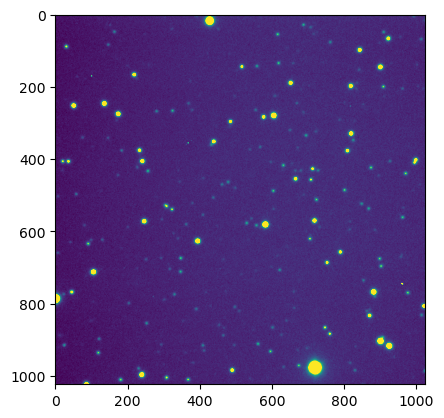

In [7]:
img_data = hdul[0].data
plt.imshow(img_data, vmin=np.percentile(img_data, 0.5), vmax=np.percentile(img_data, 99.5))

Now we also plot the same image but using the `sparc4.product_plots` library from `sparc4-pipeline`

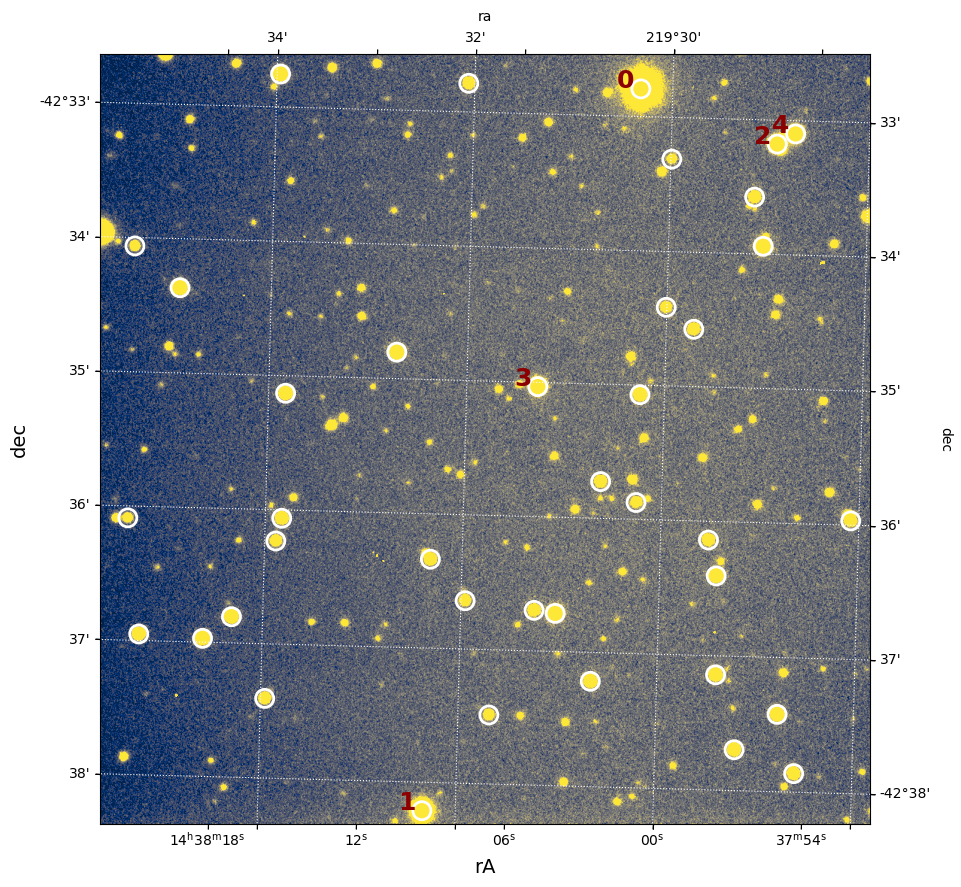

In [8]:
s4plt.plot_sci_frame(phot_stack_example, cat_ext=catalog, nstars=5, use_sky_coords=True)

Now we load the light curve FITS product and check its contents:

In [14]:
lc = fits.open(phot_lightcurve_example)
lc.info()

Filename: /Users/eder/Data/SPARC4/minidata/reduced/20230605/sparc4acs1/20230605_s4c1_CR3_S_lc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      32   ()      
  1  CATALOG_PHOT_AP005    1 BinTableHDU     38   390R x 13C   [D, D, D, D, D, D, D, D, D, D, D, D, D]   
  2  CATALOG_PHOT_AP008    1 BinTableHDU     38   390R x 13C   [D, D, D, D, D, D, D, D, D, D, D, D, D]   
  3  CATALOG_PHOT_AP010    1 BinTableHDU     38   390R x 13C   [D, D, D, D, D, D, D, D, D, D, D, D, D]   
  4  CATALOG_PHOT_AP012    1 BinTableHDU     38   390R x 13C   [D, D, D, D, D, D, D, D, D, D, D, D, D]   
  5  CATALOG_PHOT_AP015    1 BinTableHDU     38   390R x 13C   [D, D, D, D, D, D, D, D, D, D, D, D, D]   
  6  CATALOG_PHOT_AP020    1 BinTableHDU     38   390R x 13C   [D, D, D, D, D, D, D, D, D, D, D, D, D]   
  7  CATALOG_PHOT_AP025    1 BinTableHDU     38   390R x 13C   [D, D, D, D, D, D, D, D, D, D, D, D, D]   


In [15]:
pd.DataFrame(lc["CATALOG_PHOT_AP010"].data)

,TIME,SRCINDEX,RA,DEC,X,Y,FWHM,MAG,EMAG,SKYMAG,ESKYMAG,FLAG,RMS
0,2.460102e+06,0.0,219.505384,-42.546569,718.949835,977.690006,10.475343,-13.990083,0.000558,-9.358802,0.006086,0.0,0.037272
1,2.460102e+06,1.0,219.538945,-42.636872,427.674008,17.783918,11.052627,-11.883291,0.001610,-9.296565,0.005620,0.0,0.034961
2,2.460102e+06,2.0,219.482175,-42.552959,900.308296,904.297961,12.269361,-10.526687,0.003728,-9.293700,0.005975,0.0,0.035993
3,2.460102e+06,3.0,219.521361,-42.583859,581.858411,581.767953,12.202112,-10.464722,0.003864,-9.300176,0.005786,0.0,0.032293
4,2.460102e+06,4.0,219.479143,-42.551637,924.640441,917.801566,12.490490,-10.287367,0.004439,-9.291800,0.006166,0.0,0.037951
...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,2.460102e+06,34.0,219.528096,-42.624772,517.000662,143.829800,15.414398,-7.992234,0.027436,-9.283933,0.005816,0.0,0.034180
386,2.460102e+06,35.0,219.500106,-42.573591,752.884115,685.962704,15.532997,-7.969031,0.028594,-9.296067,0.005980,0.0,0.043290
387,2.460102e+06,36.0,219.589818,-42.601487,36.853568,405.974867,15.636656,-7.970135,0.026851,-9.222066,0.005762,0.0,0.024298
388,2.460102e+06,37.0,219.504290,-42.597916,712.679522,426.368577,15.822921,-7.803081,0.033017,-9.304736,0.005890,0.0,0.038117


Below we select the source with index number 3 assigned as the main target to be analyzed. Then we select three other stars with indices 0, 1, and 2, as comparisons for differential photometry. All indices are displayed in the image above.  

After selecting the stars we use the function `s4plt.plot_light_curve` to produce plots of the lightcurve data.

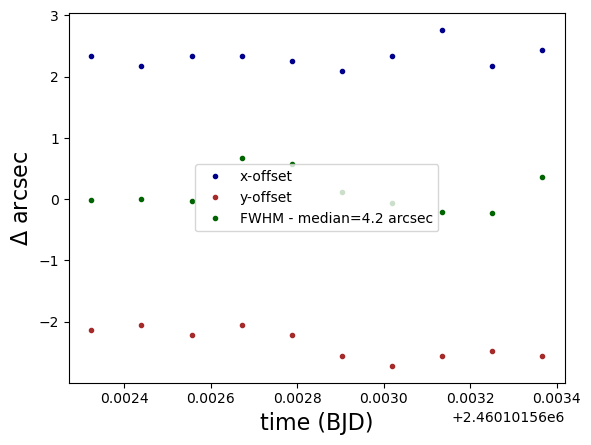

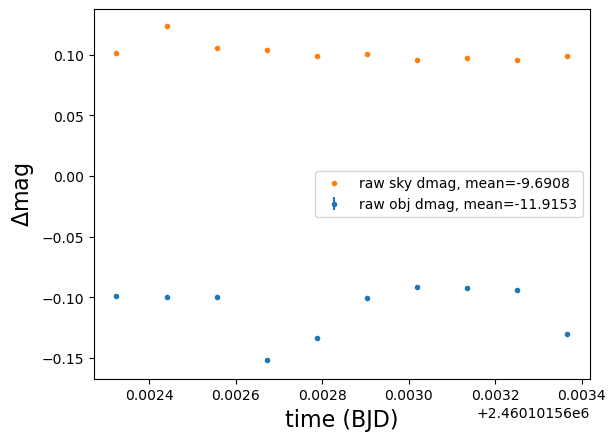

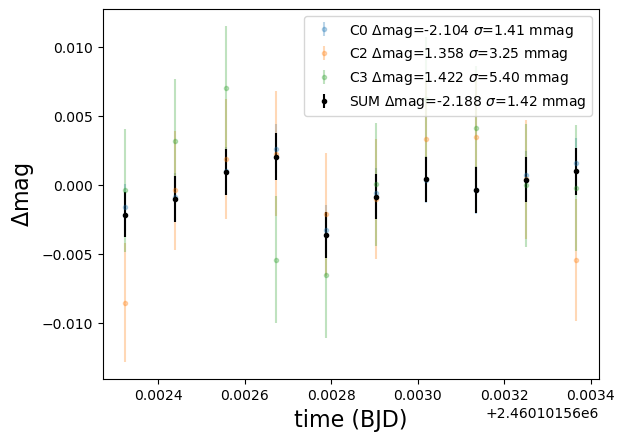

       TIME                x          ...       magsum_err            diffmagsum      
------------------ ------------------ ... --------------------- ----------------------
  2460101.56232417 427.67400847187633 ...  0.005789598203802441 -0.0021614207340157066
 2460101.562439953 427.17400847187633 ...  0.005834837862874591  -0.001042032370721202
 2460101.562555748 427.67400847187633 ... 0.0058494063790574665  0.0009454215621857998
2460101.5626715305 427.67400847187633 ...  0.006048743560512227   0.002028783419730118
 2460101.562787325 427.42400847187633 ...  0.005936435690459291 -0.0036221199364927514
 2460101.562903108 426.92400847187633 ... 0.0058046770340835704  -0.000853062875254551
2460101.5630189027 427.67400847187633 ...  0.005793223225578882 0.00040848585255304215
2460101.5631346856 428.92400847187633 ...  0.005788555183957745 -0.0003736268610587956
  2460101.56325048 427.17400847187633 ...  0.005777453360043199  0.0003736268610587956
2460101.5633662636 427.92400847187633 ...  

In [16]:
target=3
comps=[0,1,2]

lc = s4plt.plot_light_curve(phot_lightcurve_example, target=target, comps=comps, nsig=10,
                            plot_coords=True, plot_rawmags=True, plot_sum=True,
                            plot_comps=True, catalog_name=catalog)

print(lc)

In [ ]:
var_lc = fits.open(phot_lightcurve_example_varstar)
target=1
comps=[0,2,3]

lc = s4plt.plot_light_curve(phot_lightcurve_example_varstar, target=target, comps=comps, nsig=10,
                            plot_coords=True, plot_rawmags=True, plot_sum=True,
                            plot_comps=True, catalog_name=catalog)

print(lc)

# POLAR products example
***
In this example we show how to work with the polarimetric products of SPARC4

We start by reading the science image FITS file and showing its information. 

In [21]:
hdul = fits.open(polar_stack_example)
hdul.info()

Filename: /Users/eder/Data/SPARC4/minidata/reduced/sparc4acs1/20230604/20230604_s4c1_Gain1_1_Conventional_2_Hilt652_POLAR_L2__stack.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     121   (1024, 1024)   float64   
  1  CATALOG_POL_S_AP006    1 TableHDU        51   26R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  2  CATALOG_POL_N_AP006    1 TableHDU        51   26R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  3  CATALOG_POL_S_AP008    1 TableHDU        51   26R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  4  CATALOG_POL_N_AP008    1 TableHDU        51   26R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  5  CATALOG_POL_S_AP010    1 TableHDU        51   26R x 13C   [I11, D25.17, D25.17, 

Then we plot the science frame using the `sparc4.product_plots` library

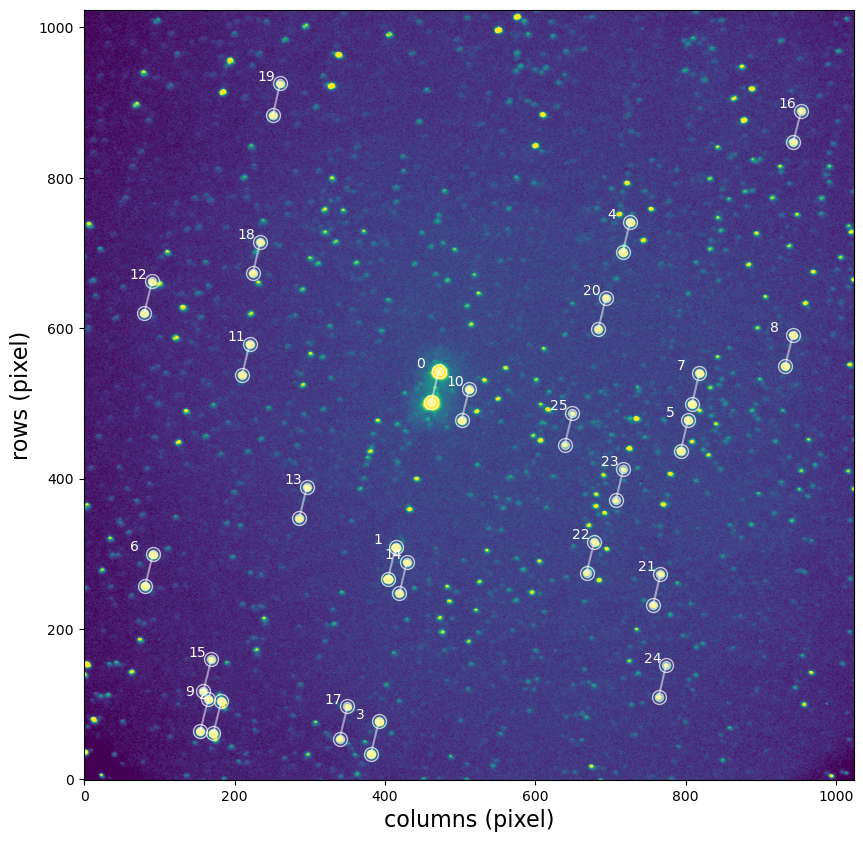

In [22]:
s4plt.plot_sci_polar_frame(polar_stack_example)

Now we open a polarimetry FITS product and print its basic information

In [23]:
polar = fits.open(polar_example)
polar.info()

Filename: /Users/eder/Data/SPARC4/minidata/reduced/sparc4acs1/20230604/20230604_s4c1_000471_stdpol_l2_polar.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     123   ()      
  1  POLARIMETRY_AP006    1 BinTableHDU    206   26R x 97C   [D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D]   
  2  POLARIMETRY_AP008    1 BinTableHDU    206   26R x 97C   [D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D]   
  3  POLARIMETRY_AP010    1 BinTableHDU    206   26R x 97C   [

Below we print one of the catalog extensions

In [24]:
pd.DataFrame(polar["POLARIMETRY_AP012"].data)

,APERINDEX,APER,SRCINDEX,RA,DEC,X1,Y1,X2,Y2,FWHM,...,FE0013,EFE0013,FO0014,EFO0014,FE0014,EFE0014,FO0015,EFO0015,FE0015,EFE0015
0,3.0,12.0,0.0,280.006987,-12.401904,471.599806,543.082193,461.537367,501.521303,8.023369,...,1.476676e+06,1509.912845,1.453425e+06,1491.042657,1.447617e+06,1489.369697,1.372072e+06,1463.713150,1.540131e+06,1527.589031
1,3.0,12.0,1.0,280.011884,-12.423962,414.205356,308.830785,404.012887,266.888298,12.489644,...,1.160295e+05,899.698321,1.131027e+05,882.892840,1.145081e+05,900.027368,1.073508e+05,886.774244,1.207756e+05,906.371171
2,3.0,12.0,2.0,280.033570,-12.443669,182.576922,104.437310,171.750598,61.253075,12.694838,...,1.073295e+05,893.634318,1.069700e+05,877.669129,1.032756e+05,884.147079,1.011801e+05,874.878386,1.096107e+05,887.174396
3,3.0,12.0,3.0,280.013426,-12.445672,391.873327,77.345769,381.436311,34.319568,12.623485,...,1.002523e+05,886.353784,9.733063e+04,878.482851,9.678486e+04,884.686058,9.184565e+04,884.841974,1.054227e+05,891.454577
4,3.0,12.0,4.0,279.983122,-12.382695,725.843277,741.514409,716.254355,700.796688,13.097731,...,6.678828e+04,870.666003,7.077108e+04,892.374762,6.560105e+04,886.370985,6.834918e+04,891.916081,6.927757e+04,879.308234
5,3.0,12.0,5.0,279.975021,-12.407108,803.176023,478.418858,793.276387,437.147812,13.124182,...,6.115321e+04,880.565378,6.167697e+04,881.776262,6.051842e+04,872.469261,5.884192e+04,883.749588,6.397373e+04,881.943858
6,3.0,12.0,6.0,280.042808,-12.425639,91.512834,299.658001,81.240926,257.718916,13.204441,...,5.965119e+04,835.458289,5.773967e+04,841.081605,5.939890e+04,838.670203,5.537684e+04,836.080569,6.072388e+04,849.884394
7,3.0,12.0,7.0,279.973736,-12.401247,818.268041,540.654730,808.215312,499.055130,13.188755,...,5.833694e+04,883.983203,5.716326e+04,877.051061,5.811961e+04,885.196429,5.462384e+04,876.111530,6.092977e+04,894.053353
8,3.0,12.0,8.0,279.961951,-12.396189,942.545988,591.332153,932.239760,549.516568,13.213374,...,5.540301e+04,869.041047,5.585901e+04,872.788502,5.488521e+04,860.629564,5.262783e+04,874.363495,5.777105e+04,871.297675
9,3.0,12.0,9.0,280.035241,-12.443454,165.237263,107.208015,154.238051,63.924853,13.345986,...,5.134452e+04,858.056290,5.950507e+04,854.472181,5.037125e+04,847.529894,5.779605e+04,844.751210,5.376116e+04,855.799384


Then we can print all column names to check the data available in each catalog

In [25]:
pd.DataFrame(polar["POLARIMETRY_AP012"].data).columns

Index(['APERINDEX', 'APER', 'SRCINDEX', 'RA', 'DEC', 'X1', 'Y1', 'X2', 'Y2',
       'FWHM', 'MAG', 'EMAG', 'SKYMAG', 'ESKYMAG', 'PHOTFLAG', 'Q', 'EQ', 'U',
       'EU', 'V', 'EV', 'P', 'EP', 'THETA', 'ETHETA', 'K', 'EK', 'ZERO',
       'EZERO', 'NOBS', 'NPAR', 'CHI2', 'POLARFLAG', 'FO0000', 'EFO0000',
       'FE0000', 'EFE0000', 'FO0001', 'EFO0001', 'FE0001', 'EFE0001', 'FO0002',
       'EFO0002', 'FE0002', 'EFE0002', 'FO0003', 'EFO0003', 'FE0003',
       'EFE0003', 'FO0004', 'EFO0004', 'FE0004', 'EFE0004', 'FO0005',
       'EFO0005', 'FE0005', 'EFE0005', 'FO0006', 'EFO0006', 'FE0006',
       'EFE0006', 'FO0007', 'EFO0007', 'FE0007', 'EFE0007', 'FO0008',
       'EFO0008', 'FE0008', 'EFE0008', 'FO0009', 'EFO0009', 'FE0009',
       'EFE0009', 'FO0010', 'EFO0010', 'FE0010', 'EFE0010', 'FO0011',
       'EFO0011', 'FE0011', 'EFE0011', 'FO0012', 'EFO0012', 'FE0012',
       'EFE0012', 'FO0013', 'EFO0013', 'FE0013', 'EFE0013', 'FO0014',
       'EFO0014', 'FE0014', 'EFE0014', 'FO0015', 'EFO0015

Finally, we can select the source of interest (in this case index=0) and then we get the polarimetry results using the function `get_polarimetry_results` from `sparc4.pipeline_lib` library:

Source index: i=0 
Source RA=280.00698687935676 Dec=-12.40190417989647 mag=-19.1708+-0.0002
Best aperture radius: 14.0 pixels
Polarization in Q: -0.0390+-0.0003
Polarization in U: 0.0189+-0.0003
Polarization in V: nan+-nan
Total linear polarization p: 0.0433+-0.0003
Angle of polarization theta: 77.1+-0.2
Free constant k: 1+-nan
Zero of polarization: 0.0+-0.0
RMS of zi residuals: 0.00066
Reduced chi-square (n=16.0, DOF=14.0): 0.85


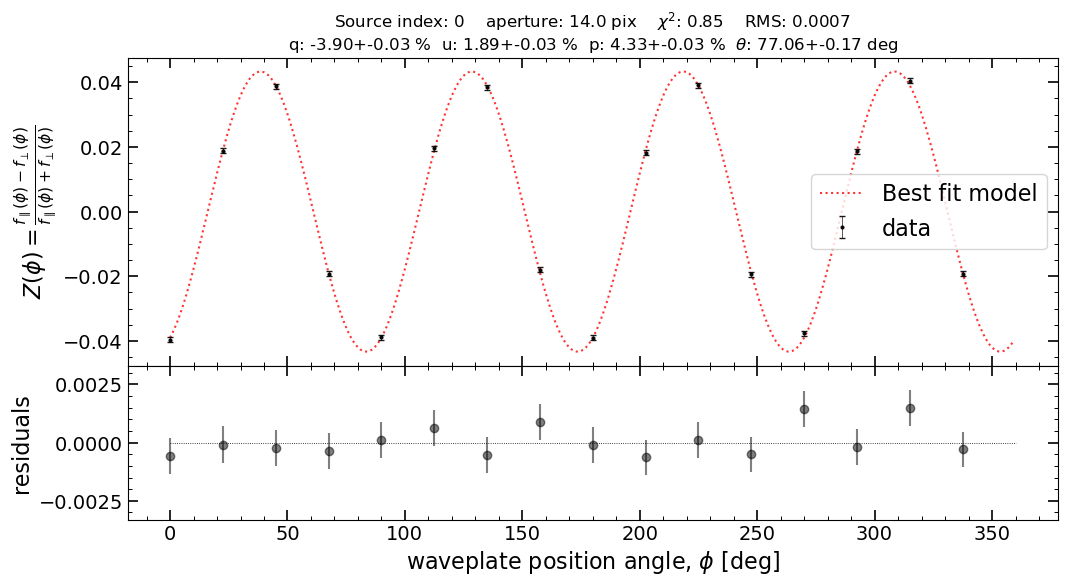

In [27]:
source_index = 0

pol_results = s4pipelib.get_polarimetry_results(polar_example,
                                                source_index=source_index,
                                                min_aperture=4,
                                                max_aperture=20,
                                                plot=True,
                                                verbose=True)

Below we print all variables names for the measurements available in the polar product

In [28]:
for key in pol_results.keys():
    print(key, ":", pol_results[key])

POLAR_PRODUCT : /Users/eder/Data/SPARC4/minidata/reduced/sparc4acs1/20230604/20230604_s4c1_000471_stdpol_l2_polar.fits
SOURCE_INDEX : 0
APERTURE_INDEX : 5
APERTURE_RADIUS : 14.0
NEXPS : 16
MAG : -19.1708+-0.0002
RA : 280.00698687935676
DEC : -12.40190417989647
FWHM : 9.545113103063592
X1 : 471.59980569056233
Y1 : 543.0821926675412
X2 : 461.5373666281943
Y2 : 501.521303485568
WAVEPLATE_ANGLES : [  0.   22.5  45.   67.5  90.  112.5 135.  157.5 180.  202.5 225.  247.5
 270.  292.5 315.  337.5]
ZI : [-0.0396+-0.0008, 0.0188+-0.0008, 0.0387+-0.0008, -0.0193+-0.0008,
 -0.0389+-0.0008, 0.0195+-0.0008, 0.0385+-0.0008, -0.0180+-0.0008,
 -0.0391+-0.0008, 0.0183+-0.0008, 0.0391+-0.0008, -0.0194+-0.0008,
 -0.0376+-0.0008, 0.0187+-0.0008, 0.0405+-0.0008, -0.0192+-0.0008]
FO : [1340000+-2000, 1423000+-2000, 1451000+-2000, 1370000+-2000, 1340000+-2000,
 1424000+-2000, 1449000+-2000, 1372000+-2000, 1346000+-2000, 1429000+-2000,
 1460000+-2000, 1379000+-2000, 1352000+-2000, 1428000+-2000, 1461000+-2000

And below we show a simple example how to get one of these measurements out. For instance, we're getting the total polarization and the polarization angle. 

In [29]:
p = pol_results["P"]*100
pa = pol_results["THETA"]
print("Polarization: {} %  Angle of polarization: {} deg".format(p,pa) )

Polarization: 4.33+-0.03 %  Angle of polarization: 77.1+-0.2 deg


Finally, we show below an example of a polarimetric time series product. 

In [30]:
polar_ts = fits.open(polar_time_series_example)
pd.DataFrame(polar_ts[1].data)

,TIME,SRCINDEX,RA,DEC,X1,Y1,X2,Y2,FWHM,MAG,...,EP,THETA,ETHETA,K,EK,ZERO,EZERO,NOBS,NPAR,CHI2
0,2.460101e+06,0.0,280.006987,-12.401904,471.599806,543.082193,461.537367,501.521303,6.839308,-19.155075,...,0.000233,77.037731,0.153635,0.925550,NaN,0.0,0.0,16.0,2.0,0.898171
1,2.460101e+06,1.0,280.011884,-12.423962,414.205356,308.830785,404.012887,266.888298,10.139638,-16.393927,...,0.001671,78.584311,1.364166,0.914225,NaN,0.0,0.0,16.0,2.0,0.962720
2,2.460101e+06,2.0,280.033570,-12.443669,182.576922,104.437310,171.750598,61.253075,10.344132,-16.282608,...,0.001141,80.220545,0.774891,0.943862,NaN,0.0,0.0,16.0,2.0,0.378865
3,2.460101e+06,3.0,280.013426,-12.445672,391.873327,77.345769,381.436311,34.319568,10.264804,-16.225204,...,0.001341,79.912088,0.806543,0.911739,NaN,0.0,0.0,16.0,2.0,0.464136
4,2.460101e+06,4.0,279.983122,-12.382695,725.843277,741.514409,716.254355,700.796688,10.712134,-15.823310,...,0.002874,71.788930,3.024948,1.013950,NaN,0.0,0.0,16.0,2.0,1.036576
5,2.460101e+06,5.0,279.975021,-12.407108,803.176023,478.418858,793.276387,437.147812,10.716540,-15.724545,...,0.002407,80.082001,1.614923,0.930841,NaN,0.0,0.0,16.0,2.0,0.607161
6,2.460101e+06,6.0,280.042808,-12.425639,91.512834,299.658001,81.240926,257.718916,10.835230,-15.654547,...,0.002769,78.237865,2.106437,0.929927,NaN,0.0,0.0,16.0,2.0,0.779344
7,2.460101e+06,7.0,279.973736,-12.401247,818.268041,540.654730,808.215312,499.055130,10.783453,-15.639165,...,0.002251,78.240455,1.473745,0.939184,NaN,0.0,0.0,16.0,2.0,0.455828
8,2.460101e+06,8.0,279.961951,-12.396189,942.545988,591.332153,932.239760,549.516568,10.800471,-15.603874,...,0.001676,79.815929,1.121934,0.947594,NaN,0.0,0.0,16.0,2.0,0.245015
9,2.460101e+06,9.0,280.035241,-12.443454,165.237263,107.208015,154.238051,63.924853,10.925826,-15.529457,...,0.003204,76.086893,2.376842,1.018478,NaN,0.0,0.0,16.0,2.0,0.816038


In [31]:
pd.DataFrame(polar_ts[1].data).columns

Index(['TIME', 'SRCINDEX', 'RA', 'DEC', 'X1', 'Y1', 'X2', 'Y2', 'FWHM', 'MAG',
       'EMAG', 'Q', 'EQ', 'U', 'EU', 'V', 'EV', 'P', 'EP', 'THETA', 'ETHETA',
       'K', 'EK', 'ZERO', 'EZERO', 'NOBS', 'NPAR', 'CHI2'],
      dtype='object')

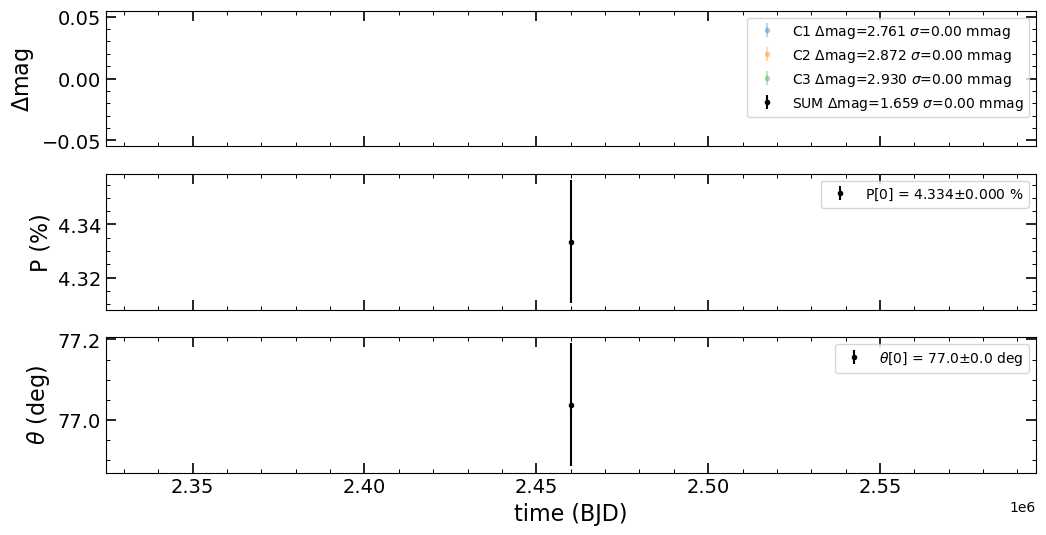

In [32]:
s4plt.plot_polar_time_series(polar_time_series_example, 
                             target=0, 
                             comps=[1,2,3], 
                             plot_total_polarization=True, 
                             plot_polarization_angle=True)